In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecg-image-data/ECG_Image_data/test/N/N34415.png
/kaggle/input/ecg-image-data/ECG_Image_data/test/N/N40920.png
/kaggle/input/ecg-image-data/ECG_Image_data/test/N/N56929.png
/kaggle/input/ecg-image-data/ECG_Image_data/test/N/N75771.png
/kaggle/input/ecg-image-data/ECG_Image_data/test/N/N33781.png
/kaggle/input/ecg-image-data/ECG_Image_data/test/N/N35517.png
/kaggle/input/ecg-image-data/ECG_Image_data/test/N/N80844.png
/kaggle/input/ecg-image-data/ECG_Image_data/test/N/N28242.png
/kaggle/input/ecg-image-data/ECG_Image_data/test/N/N55725.png
/kaggle/input/ecg-image-data/ECG_Image_data/test/N/N39273.png
/kaggle/input/ecg-image-data/ECG_Image_data/test/N/N81353.png
/kaggle/input/ecg-image-data/ECG_Image_data/test/N/N4426.png
/kaggle/input/ecg-image-data/ECG_Image_data/test/N/N90807.png
/kaggle/input/ecg-image-data/ECG_Image_data/test/N/N63713.png
/kaggle/input/ecg-image-data/ECG_Image_data/test/N/N83618.png
/kaggle/input/ecg-image-data/ECG_Image_data/test/N/N77105.png
/kaggle/i

In [69]:
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

In [70]:
%%time
dir = Path('/kaggle/input/ecg-image-data/ECG_Image_data/train')

filepaths = list(dir.glob(r'**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))


filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

dataframe_train = pd.concat([filepaths , labels] , axis=1)
dataframe_train

CPU times: user 2.48 s, sys: 728 ms, total: 3.21 s
Wall time: 44 s


Filepath Label
0      /kaggle/input/ecg-image-data/ECG_Image_data/tr...     N
1      /kaggle/input/ecg-image-data/ECG_Image_data/tr...     N
2      /kaggle/input/ecg-image-data/ECG_Image_data/tr...     N
3      /kaggle/input/ecg-image-data/ECG_Image_data/tr...     N
4      /kaggle/input/ecg-image-data/ECG_Image_data/tr...     N
...                                                  ...   ...
99194  /kaggle/input/ecg-image-data/ECG_Image_data/tr...     V
99195  /kaggle/input/ecg-image-data/ECG_Image_data/tr...     V
99196  /kaggle/input/ecg-image-data/ECG_Image_data/tr...     V
99197  /kaggle/input/ecg-image-data/ECG_Image_data/tr...     V
99198  /kaggle/input/ecg-image-data/ECG_Image_data/tr...     V

[99199 rows x 2 columns]

In [71]:
dataframe_train['Label'].value_counts()

Label
N    75709
M     8405
Q     6431
V     5789
S     2223
F      642
Name: count, dtype: int64

In [72]:
samples = []
for category in ['N','M','Q','V','S','F']:
    category_slice = dataframe_train.query("Label == @category")
    samples.append(category_slice.sample(640, random_state=1))

dataframe_train = pd.concat(samples, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
dataframe_train['Label'].value_counts()

Label
N    640
Q    640
S    640
F    640
M    640
V    640
Name: count, dtype: int64

In [73]:
%%time
dir = Path('/kaggle/input/ecg-image-data/ECG_Image_data/test')

filepaths = list(dir.glob(r'**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))


filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

dataframe_test = pd.concat([filepaths , labels] , axis=1)
dataframe_test

CPU times: user 443 ms, sys: 181 ms, total: 624 ms
Wall time: 9.25 s


Filepath Label
0      /kaggle/input/ecg-image-data/ECG_Image_data/te...     N
1      /kaggle/input/ecg-image-data/ECG_Image_data/te...     N
2      /kaggle/input/ecg-image-data/ECG_Image_data/te...     N
3      /kaggle/input/ecg-image-data/ECG_Image_data/te...     N
4      /kaggle/input/ecg-image-data/ECG_Image_data/te...     N
...                                                  ...   ...
24794  /kaggle/input/ecg-image-data/ECG_Image_data/te...     V
24795  /kaggle/input/ecg-image-data/ECG_Image_data/te...     V
24796  /kaggle/input/ecg-image-data/ECG_Image_data/te...     V
24797  /kaggle/input/ecg-image-data/ECG_Image_data/te...     V
24798  /kaggle/input/ecg-image-data/ECG_Image_data/te...     V

[24799 rows x 2 columns]

In [74]:
dataframe_test['Label'].value_counts()

Label
N    18926
M     2101
Q     1608
V     1447
S      556
F      161
Name: count, dtype: int64

In [75]:
samples = []
for category in ['N','M','Q','V','S','F']:
    category_slice = dataframe_test.query("Label == @category")
    samples.append(category_slice.sample(160, random_state=1))

dataframe_test = pd.concat(samples, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
dataframe_test['Label'].value_counts()

Label
M    160
F    160
Q    160
N    160
V    160
S    160
Name: count, dtype: int64

In [174]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip='True',
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2,
    rotation_range=20
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [175]:
size=224
color_mode='rgb'
batch_size=32

train_images = train_generator.flow_from_dataframe(
    dataframe=dataframe_train,
    x_col='Filepath',
    y_col='Label',
    target_size=(size, size),
    color_mode=color_mode,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=dataframe_train,
    x_col='Filepath',
    y_col='Label',
    target_size=(size, size),
    color_mode=color_mode,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=dataframe_test,
    x_col='Filepath',
    y_col='Label',
    target_size=(size, size),
    color_mode=color_mode,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False
)

Found 3072 validated image filenames belonging to 6 classes.
Found 768 validated image filenames belonging to 6 classes.
Found 960 validated image filenames belonging to 6 classes.


In [177]:
test_images.class_indices

{'F': 0, 'M': 1, 'N': 2, 'Q': 3, 'S': 4, 'V': 5}

In [179]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization

In [184]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(size, size, 3)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))


In [185]:
model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_96 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_83 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_97 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_84 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_36 (Flatten)        (None, 186624)            0         
                                                                 
 dense_127 (Dense)           (None, 128)             

In [186]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [187]:
result=model.fit(train_images,
    validation_data=val_images,
    epochs=10
    )

Epoch 1/10
96/96 [==============================] - 53s 539ms/step - loss: 1.4751 - accuracy: 0.5234 - val_loss: 0.0216 - val_accuracy: 1.0000
Epoch 2/10
96/96 [==============================] - 52s 539ms/step - loss: 0.0851 - accuracy: 0.9736 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 3/10
96/96 [==============================] - 52s 546ms/step - loss: 0.0212 - accuracy: 0.9938 - val_loss: 4.4444e-05 - val_accuracy: 1.0000
Epoch 4/10
96/96 [==============================] - 52s 542ms/step - loss: 0.0076 - accuracy: 0.9974 - val_loss: 3.2829e-06 - val_accuracy: 1.0000
Epoch 5/10
96/96 [==============================] - 52s 539ms/step - loss: 0.0126 - accuracy: 0.9964 - val_loss: 1.4316e-06 - val_accuracy: 1.0000
Epoch 6/10
96/96 [==============================] - 52s 540ms/step - loss: 0.0166 - accuracy: 0.9958 - val_loss: 0.0121 - val_accuracy: 1.0000
Epoch 7/10
96/96 [==============================] - 52s 541ms/step - loss: 0.0259 - accuracy: 0.9928 - val_loss: 2.2508e-05 - val_

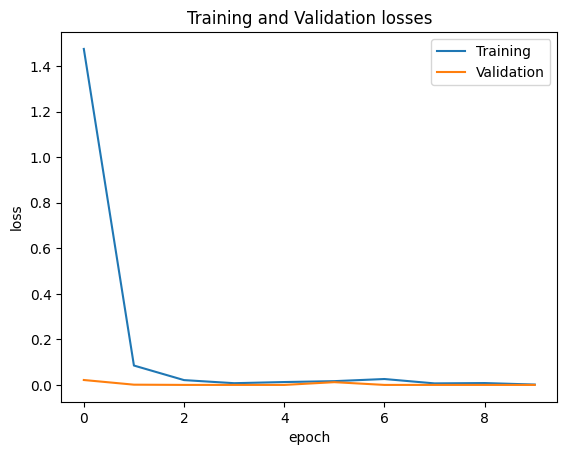

In [188]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig( 'loss.jpg', dpi=500, bbox_inches = 'tight')

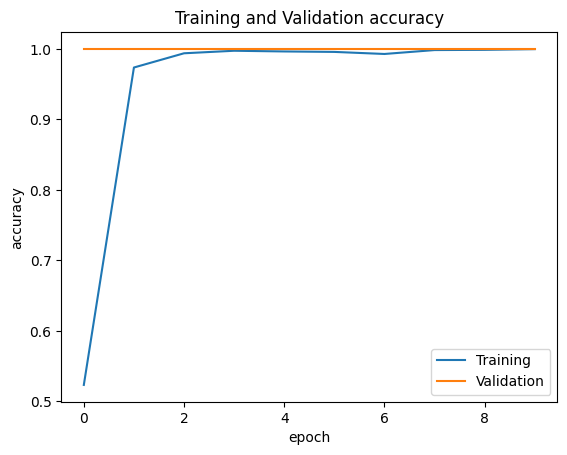

In [189]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.savefig( 'accuracy.jpg', dpi=500, bbox_inches = 'tight')

In [191]:
from tensorflow.keras.models import load_model,save_model

In [192]:
model.save('/kaggle/working/Arrhythmia_take2.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [193]:
cnn_model=load_model('/kaggle/working/Arrhythmia_take2.h5')

In [194]:
y_pred=cnn_model.predict(test_images)
y_pred

30/30 [==============================] - 9s 305ms/step


array([[2.45504595e-19, 1.00000000e+00, 5.56830887e-21, 7.15059331e-19,
        2.15877217e-21, 6.38250708e-16],
       [1.00000000e+00, 1.35809568e-23, 4.74599983e-27, 4.35851235e-28,
        2.58018199e-24, 5.35683316e-27],
       [1.25737704e-13, 9.19829924e-12, 3.71082085e-14, 1.00000000e+00,
        1.72380461e-13, 1.56030022e-10],
       ...,
       [1.00000000e+00, 1.10090196e-16, 2.31896950e-20, 5.32137001e-21,
        7.01178423e-18, 3.65153744e-20],
       [1.85693352e-16, 1.00000000e+00, 1.03918800e-17, 8.52130974e-16,
        5.73962015e-18, 2.35237150e-13],
       [1.07035047e-10, 7.52188703e-14, 1.00000000e+00, 4.87716828e-14,
        7.13354668e-13, 8.98510502e-11]], dtype=float32)

In [195]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 0, 3, 3, 3, 1, 0, 1, 2, 2, 5, 3, 1, 2, 4, 4, 2, 4, 5, 2, 1, 3,
       4, 2, 4, 4, 1, 3, 2, 5, 3, 1, 2, 3, 2, 3, 1, 5, 1, 5, 0, 5, 1, 3,
       1, 4, 1, 4, 1, 0, 2, 2, 0, 3, 3, 0, 0, 0, 4, 0, 3, 5, 2, 5, 3, 0,
       5, 3, 1, 5, 1, 5, 5, 5, 5, 3, 0, 2, 0, 2, 0, 0, 4, 3, 2, 5, 2, 4,
       5, 5, 4, 5, 0, 1, 4, 2, 4, 1, 4, 2, 5, 2, 4, 5, 4, 4, 1, 0, 1, 4,
       2, 4, 4, 5, 2, 2, 2, 3, 3, 3, 0, 2, 4, 0, 1, 3, 4, 1, 1, 5, 4, 5,
       2, 4, 2, 0, 3, 3, 2, 0, 1, 2, 1, 3, 0, 0, 4, 3, 2, 1, 5, 3, 4, 4,
       1, 2, 1, 3, 5, 3, 3, 5, 5, 3, 4, 1, 4, 0, 3, 0, 5, 4, 1, 1, 0, 5,
       2, 5, 5, 2, 5, 0, 1, 3, 4, 1, 4, 1, 4, 2, 1, 4, 3, 4, 1, 4, 0, 0,
       5, 1, 5, 5, 5, 0, 1, 2, 0, 2, 4, 0, 0, 3, 0, 4, 2, 4, 1, 0, 5, 0,
       5, 0, 3, 2, 1, 2, 0, 5, 2, 4, 1, 2, 4, 0, 5, 2, 5, 5, 4, 1, 3, 2,
       4, 4, 5, 5, 0, 3, 2, 3, 2, 4, 2, 3, 4, 4, 3, 3, 0, 0, 4, 0, 2, 1,
       5, 1, 3, 2, 5, 5, 1, 5, 3, 5, 0, 2, 0, 1, 4, 5, 4, 4, 0, 0, 2, 3,
       3, 2, 0, 5, 4, 3, 1, 2, 1, 0, 1, 0, 5, 2, 3,

In [196]:
from sklearn.metrics import confusion_matrix, classification_report


cm = confusion_matrix(test_images.labels, y_pred)
print(cm)

report = classification_report(test_images.labels, y_pred, target_names=['F', 'M', 'N', 'Q', 'S', 'V'],digits=4)
print(report )
def report_to_df(report):
    report = [x.split(' ') for x in report.split('\n')]
    header = ['Class Name']+[x for x in report[0] if x!='']
    values = []
    for row in report[1:-5]:
        row = [value for value in row if value!='']
        if row!=[]:
            values.append(row)
    df = pd.DataFrame(data = values, columns = header)
    return df
report = report_to_df(report)

report.to_csv('classification report.csv', index=True)

[[160   0   0   0   0   0]
 [  0 160   0   0   0   0]
 [  0   0 160   0   0   0]
 [  0   0   0 160   0   0]
 [  0   0   0   0 160   0]
 [  0   0   0   0   0 160]]
              precision    recall  f1-score   support

           F     1.0000    1.0000    1.0000       160
           M     1.0000    1.0000    1.0000       160
           N     1.0000    1.0000    1.0000       160
           Q     1.0000    1.0000    1.0000       160
           S     1.0000    1.0000    1.0000       160
           V     1.0000    1.0000    1.0000       160

    accuracy                         1.0000       960
   macro avg     1.0000    1.0000    1.0000       960
weighted avg     1.0000    1.0000    1.0000       960



In [219]:
import cv2

test_img=cv2.imread('/kaggle/input/hyythtbf/R (2).png')
test_img=cv2.resize(test_img,(224,224))

In [220]:
test_img=test_img.reshape((1,224,224,3))

In [221]:
pred=cnn_model.predict(test_img)
pred

1/1 [==============================] - 0s 21ms/step


array([[0., 1., 0., 0., 0., 0.]], dtype=float32)